MINI DDSM DATASET

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data_path = r'C:\Users\qptja\Desktop\archive\Mini_DDSM_Upload'

cancer_df = pd.read_excel(os.path.join(data_path, r'C:\Users\qptja\Desktop\archive\Mini_DDSM_Upload\List_Cancer.xlsx'))
cancer_files = cancer_df['fileName'].tolist()
cancer_views = cancer_df['View'].tolist()


benign_df = pd.read_excel(os.path.join(data_path, 'C:/Users/qptja/Desktop/archive/Mini_DDSM_Upload/List_Benign.xlsx'))
benign_files = benign_df['fileName'].tolist()
benign_views = benign_df['View'].tolist()

normal_df = pd.read_excel(os.path.join(data_path, 'C:/Users/qptja/Desktop/archive/Mini_DDSM_Upload/List_Normal.xlsx'))
normal_files = normal_df['fileName'].tolist()
normal_views = normal_df['View'].tolist()

In [3]:
def preprocess_image(image_path, view):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    
    # Enhance the contrast using histogram equalization
    #print('Applying histogram equalization...')
    image = exposure.equalize_hist(image)
    
    # Resize the image to a uniform size (e.g. 512x512) -> now 256 * 256
    #print('Resizing image...')
    image = cv2.resize(image, (256, 256))
    
    # Scale the pixel values between 0 and 1
    image = image / 255.0
    
    # Flip the image horizontally if it is a right view
    if view.endswith('R'):
        image = cv2.flip(image, 1)
    
    return image

In [4]:
# Initialize lists to store the preprocessed images and labels
X = []
y = []

# Preprocess the Cancer images
for i, file in enumerate(cancer_files):
    view = cancer_views[i]
    #image_path = os.path.join(data_path, 'Cancer', view, file + '.png')
    image_path = os.path.join(data_path, 'Cancer' , file)
    #print(image_path)
    image = preprocess_image(image_path, view)
    X.append(image)
    y.append(1)
#C:\Users\qptja\Desktop\archive\Mini_DDSM_Upload\Cancer\1_C_0001_1.RIGHT_MLO.LJPEG.1_highpass.png
# Preprocess the Benign images
for i, file in enumerate(benign_files):
    view = benign_views[i]
    image_path = os.path.join(data_path, 'Benign', file)
    image = preprocess_image(image_path, view)
    X.append(image)
    y.append(1)

# # Preprocess the Normal images
for i, file in enumerate(normal_files):
    view = normal_views[i]
    image_path = os.path.join(data_path, 'Normal', file)
    image = preprocess_image(image_path, view)
    X.append(image)
    y.append(0)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


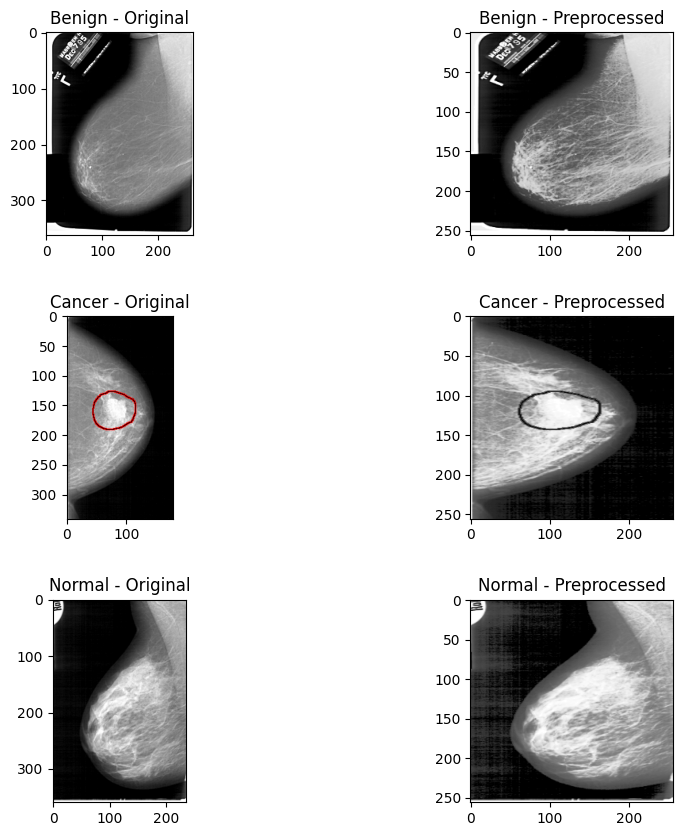

In [31]:
import random
import matplotlib.pyplot as plt

# Define labels for the dataset
labels = ['Benign', 'Cancer', 'Normal']

# Define a dictionary to store the file names for each label
file_dict = {label: os.listdir(os.path.join(data_path, label)) for label in labels}

# Display the original and preprocessed images side by side in 3 rows
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    # Randomly select one image from each label
    rand_file = random.choice(file_dict[labels[i]])
    
    # Display the original image
    img = plt.imread(os.path.join(data_path, labels[i], rand_file))
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_title(f'{labels[i]} - Original')

    # Display the preprocessed image
    img = preprocess_image(os.path.join(data_path, labels[i], rand_file), view)
    axs[i, 1].imshow(img, cmap='gray')
    axs[i, 1].set_title(f'{labels[i]} - Preprocessed')

plt.show()


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Train the model on the training set
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/5
194/194 - 83s - loss: 0.6028 - accuracy: 0.7149 - 83s/epoch - 426ms/step
Epoch 2/5
194/194 - 70s - loss: 0.5986 - accuracy: 0.7162 - 70s/epoch - 362ms/step
Epoch 3/5
194/194 - 76s - loss: 0.5984 - accuracy: 0.7162 - 76s/epoch - 393ms/step
Epoch 4/5
194/194 - 78s - loss: 0.6009 - accuracy: 0.7162 - 78s/epoch - 402ms/step
Epoch 5/5
194/194 - 81s - loss: 0.5990 - accuracy: 0.7162 - 81s/epoch - 419ms/step
61/61 - 8s - loss: 0.5947 - accuracy: 0.7192 - 8s/epoch - 125ms/step
Test loss: 0.5947
Test accuracy: 0.7192
